In [10]:
import matplotlib.pyplot as plt
import random

import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
from keras.models import Sequential

In [3]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [8]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)
X_train = X_train/255
Y_train = Y_train/255

In [6]:
print("shape of X_train: ",X_train.shape)
print("shape of Y_train: ",Y_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of Y_test: ",Y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

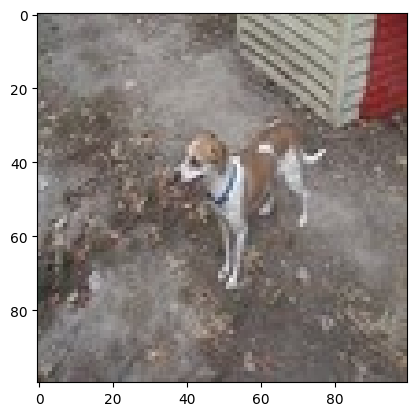

In [168]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show

In [17]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [62]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [160]:
model.fit(X_train,Y_train,epochs=6,batch_size=64)

Epoch 1/6
32/32 [==============================] - 6s 176ms/step - loss: 0.0138 - accuracy: 0.5000
Epoch 2/6
32/32 [==============================] - 6s 187ms/step - loss: 0.0138 - accuracy: 0.5000
Epoch 3/6
32/32 [==============================] - 5s 171ms/step - loss: 0.0138 - accuracy: 0.5000
Epoch 4/6
32/32 [==============================] - 6s 189ms/step - loss: 0.0138 - accuracy: 0.5000
Epoch 5/6
32/32 [==============================] - 6s 180ms/step - loss: 0.0137 - accuracy: 0.5000
Epoch 6/6
32/32 [==============================] - 6s 176ms/step - loss: 0.0137 - accuracy: 0.5000


In [21]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 22ms/step - loss: 398.1653 - accuracy: 0.5000


[398.1653137207031, 0.5]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 23ms/step
prediction: [[0.]]
this is a : dog


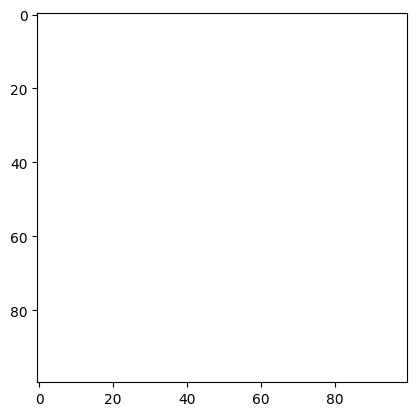

In [179]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(f'prediction: {y_pred}')
y_pred = y_pred>0.05
if(y_pred==0):
    pred = 'dog'
else:
    pred = 'cat'
print('this is a :',pred)